In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [4]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

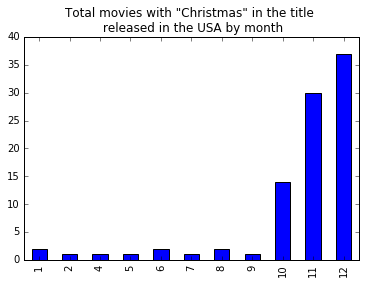

In [28]:
rd = release_dates
rd = rd[(rd['title'].str.contains('Christmas')) & 
        (rd['country'] == 'USA')].groupby('date').size()
rd = rd.groupby(rd.index.month).size()
rd.plot(kind='bar',title='Total movies with "Christmas" in the title \n released in the USA by month')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

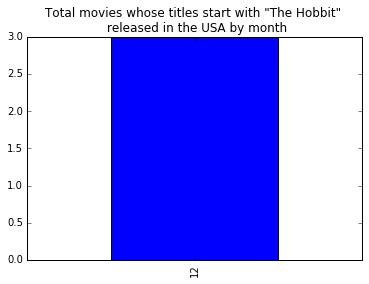

In [29]:
rd = release_dates
rd = rd[(rd['title'].str.startswith('The Hobbit')) & 
        (rd['country'] == 'USA')].groupby('date').size()
rd = rd.groupby(rd.index.month).size()
rd.plot(kind='bar',title='Total movies whose titles start with "The Hobbit" \n released in the USA by month')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

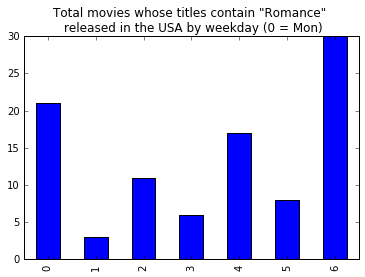

In [51]:
rd = release_dates
rd = rd[(rd['title'].str.contains('Romance')) & 
        (rd['country'] == 'USA')].groupby('date').size()
rd = rd.groupby(rd.index.weekday).size()
rd.plot(kind='bar',title='Total movies whose titles contain "Romance" \n released in the USA by weekday (0 = Mon)')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

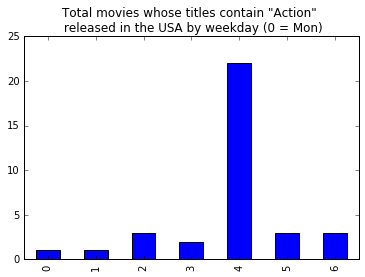

In [52]:
rd = release_dates
rd = rd[(rd['title'].str.contains('Action')) & 
        (rd['country'] == 'USA')].groupby('date').size()
rd = rd.groupby(rd.index.weekday).size()
rd.plot(kind='bar',title='Total movies whose titles contain "Action" \n released in the USA by weekday (0 = Mon)')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [70]:
jd_1990s  = cast[(cast['name'] == 'Judi Dench') & (cast['year'] // 10 == 199)][['title','year']]
usa_1990s = release_dates[(release_dates['country'] == 'USA') & 
                          (release_dates['year'] // 10 == 199)][['title','year','date']]
jd_usa_1990s = pd.merge(left=jd_1990s, right=usa_1990s, on=['title','year'])
jd_usa_1990s = jd_usa_1990s[['title','date']].sort_values('date')
jd_usa_1990s

,title,date
0,GoldenEye,1995-11-17
2,Jack & Sarah,1996-03-22
1,Hamlet,1996-12-25
3,Mrs Brown,1997-10-03
7,Tomorrow Never Dies,1997-12-19
4,Shakespeare in Love,1999-01-08
5,Tea with Mussolini,1999-05-14
6,The World Is Not Enough,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

In [74]:
jd_films = cast[cast['name'] == 'Judi Dench'][['title','year']]
usa_releases = release_dates[release_dates['country'] == 'USA'][['title','year','date']]
jd_usa_releases = pd.merge(jd_films, usa_releases, on=['title','year'])
jd_usa_releases = jd_usa_releases[['title','date']].sort_values('date')
jd_usa_releases = jd_usa_releases.groupby('date').size()
jd_usa_releases = jd_usa_releases.groupby(jd_usa_releases.index.month).size()
jd_usa_releases

1      4
2      3
3      3
4      2
5      4
6      3
7      2
8      1
9      1
10     1
11    11
12     4
dtype: int64

It would appear that Judi Dench's movies are most often released in November in the USA.

### In which months do films with Tom Cruise tend to be released in the USA?

In [80]:
tc_films = cast[cast['name'] == 'Tom Cruise'][['title','year']]
usa_releases = release_dates[release_dates['country'] == 'USA'][['title','year','date']]
tc_usa_releases = pd.merge(tc_films, usa_releases, on=['title','year'])
tc_usa_releases = tc_usa_releases[['title','date']].sort_values('date')
tc_usa_releases = tc_usa_releases.groupby('date').size()
tc_usa_releases = tc_usa_releases.groupby(tc_usa_releases.index.month).size()
tc_usa_releases

1      3
3      1
4      3
5      5
6      8
7      5
8      3
10     3
11     3
12    10
dtype: int64

It appears that Tom Cruise's movies are most frequently released in the USA in December and June.